In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
import pickle


file = open('QuandlApiKey', 'r')
api_key = file.read()
file.close()
df = quandl.get("FMAC/HPI_TX", authtoken=api_key)

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][2:]
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    for abbre in states:
        query = 'FMAC/HPI_'+str(abbre)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbre)}, inplace=True)
        df[abbre] = (df[abbre]-df[abbre][0]) / df[abbre][0] * 100.0
        print(df.head())

        if main_df.empty:
            main_df=df
        else:
            main_df = main_df.join(df, how='left')
    print(main_df)

    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

#grab_initial_state_data()
    
HPI_data = pd.read_pickle('fiddy_states3.pickle')


In [2]:
HPI_data['TX2'] = HPI_data['TX'] * 2
print(HPI_data[['TX','TX2']].head())
del HPI_data['TX2']

                  TX        TX2
Date                           
1975-01-31  0.000000   0.000000
1975-02-28  1.025783   2.051567
1975-03-31  2.804068   5.608135
1975-04-30  5.363041  10.726082
1975-05-31  6.135463  12.270927


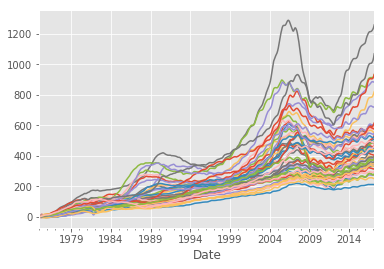

In [3]:
HPI_data.plot()
plt.legend().remove()
plt.show()

In [4]:
def HPI_Benchmark():
    benchmark = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    benchmark.rename(columns={"Value":"United States"}, inplace=True)
    benchmark["United States"] = (benchmark["United States"] \
                              - benchmark["United States"][0])\
                              / benchmark["United States"][0] * 100.0
    return benchmark
benchmark = HPI_Benchmark()
print(benchmark.head())

            United States
Date                     
1975-01-31       0.000000
1975-02-28       0.660589
1975-03-31       1.725927
1975-04-30       3.109289
1975-05-31       3.982778


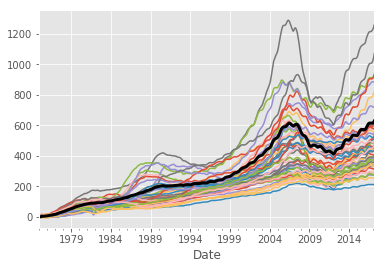

In [5]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

HPI_data.plot(ax=ax1)
benchmark.plot(color='k', ax=ax1, linewidth=3)

plt.legend().remove()
plt.show()

In [6]:
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation.head())

          AK        AZ        AR        CA        CO        CT        DE  \
AK  1.000000  0.913740  0.968958  0.924687  0.959531  0.883311  0.938175   
AZ  0.913740  1.000000  0.938129  0.977692  0.921470  0.915140  0.948394   
AR  0.968958  0.938129  1.000000  0.946832  0.973680  0.943174  0.977694   
CA  0.924687  0.977692  0.946832  1.000000  0.940771  0.937952  0.966011   
CO  0.959531  0.921470  0.973680  0.940771  1.000000  0.880236  0.930923   

          FL        GA        HI    ...           SD        TN        TX  \
AK  0.904693  0.903722  0.948851    ...     0.975483  0.959709  0.977707   
AZ  0.994591  0.951064  0.920672    ...     0.910663  0.935131  0.899725   
AR  0.929991  0.969260  0.952306    ...     0.986582  0.994957  0.958768   
CA  0.986476  0.953420  0.953714    ...     0.933646  0.947976  0.920663   
CO  0.913833  0.955939  0.931470    ...     0.986394  0.981656  0.979410   

          UT        VT        VA        WA        WV        WI        WY  
AK  0.96493

In [7]:
print(HPI_State_Correlation.describe().head())

              AK         AZ         AR         CA         CO         CT  \
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean    0.940585   0.934492   0.971018   0.947187   0.952504   0.929082   
std     0.042176   0.027246   0.026390   0.024181   0.030545   0.040346   
min     0.777863   0.852627   0.865239   0.872861   0.841938   0.817784   
25%     0.928915   0.920213   0.965283   0.933646   0.933353   0.901621   

              DE         FL         GA         HI    ...             SD  \
count  49.000000  49.000000  49.000000  49.000000    ...      49.000000   
mean    0.962296   0.931363   0.953666   0.939215    ...       0.959756   
std     0.028932   0.030841   0.026719   0.033758    ...       0.035896   
min     0.867719   0.840407   0.856090   0.790766    ...       0.815458   
25%     0.950047   0.913835   0.944650   0.926750    ...       0.949747   

              TN         TX         UT         VT         VA         WA  \
count  49.000000  49.00

In [8]:
print(HPI_data.describe().head())

               AK          AZ          AR          CA          CO          CT  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean   195.154681  222.828537  145.281325  515.483781  299.517380  280.852135   
std    121.765626  156.981792   82.196098  369.006400  206.649285  167.351914   
min      0.000000   -0.435488    0.000000    0.000000    0.000000    0.000000   
25%    106.289259  114.771135   80.778017  199.098327  127.313581  140.122415   

               DE          FL          GA          HI     ...              SD  \
count  507.000000  507.000000  507.000000  507.000000     ...      507.000000   
mean   250.169566  217.683196  160.048912  345.986149     ...      136.721932   
std    170.534369  161.387990   99.285421  260.487924     ...      100.347633   
min      0.000000    0.000000   -4.111655   -0.268004     ...       -6.524535   
25%     92.711177   98.169204   81.407718   95.528756     ...       51.424246   

               TN         

In [9]:
print(benchmark.head())

            United States
Date                     
1975-01-31       0.000000
1975-02-28       0.660589
1975-03-31       1.725927
1975-04-30       3.109289
1975-05-31       3.982778


In [10]:
print(benchmark.tail())

            United States
Date                     
2016-11-30     614.138724
2016-12-31     614.102345
2017-01-31     615.385236
2017-02-28     619.478601
2017-03-31     627.543222


In [11]:
import datetime
import pandas_datareader.data as web
from pandas_datareader import data, wb

start_date = datetime.datetime(1975,1,31)
end_date = datetime.datetime(2017,3,31)

# df_apple = web.DataReader("APPL","google",start_date,end_date)
# df_MSFT = web.DataReader("MSFT","google",start_date,end_date)
# print(df_MSFT.head())
# print(df_MSFT.tail())

# print(benchmark.head())





In [12]:

# merged = pd.merge(benchmark, df_MSFT, on="Date", how="inner")

# benchmark.rename(columns={"Date":"Date"}, inplace=True)
# df_MSFT.rename(columns={"Date":"Date"}, inplace=True)

# df_MSFT = df_MSFT.join(benchmark,how="inner")
# print(df_MSFT)
#benchmark.describe()
#benchmark["Close"]
#benchmark["Close"] = (benchmark["Close"]-benchmark["Close"][0])/benchmark["Close"][0] * 100.0

In [13]:
# benchmark[["United States","Close"]].plot()
# plt.show()